 # PyPRT - ArcGIS API for Python Case Study

 Description: this notebook is used to test the ArcGIS API for Python in relation to pyprt module.

In [1]:
import sys, os
SDK_PATH = os.path.join(os.getcwd(), "..", "install", "bin")
sys.path.append(SDK_PATH)

In [2]:
import numpy as np
import pandas as pd

import pyprt

import arcgis
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import Geometry
from arcgis.features import SpatialDataFrame
from arcgis.features import FeatureLayerCollection
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [3]:
CS_FOLDER = os.getcwd()
def asset_file(filename):
    return os.path.join(CS_FOLDER, filename)

#### Test arcgis and pyprt module

In [4]:
my_gis = GIS(username="CLechot_zurich")
my_gis.map()

Enter password: ········


MapView(layout=Layout(height='400px', width='100%'))

In [5]:
VAL = pyprt.print_val(4074)
print("\nTest Function: it should print 4074.")
print(VAL)


Test Function: it should print 4074.
4074


In [6]:
print("\nInitializing PRT.")
pyprt.initialize_prt(SDK_PATH)

if(not pyprt.is_prt_initialized()):
    raise Exception("PRT is not initialized")


Initializing PRT.


In [7]:
mod = pyprt.ModelGenerator(asset_file("simple_scene_0.obj"), asset_file("simple_rule2019.rpk"), ["ruleFile:string=bin/simple_rule2019.cgb", "startRule:string=Default$Footprint"], ["baseName:string=theModelSuper"])

if(mod.generate_model()):
    geo = mod.get_model_geometry()
    geo_numpy = np.array(geo)
    print("\nSize of the matrix containing all the model vertices:")
    print(geo_numpy.shape)
    rep_float = mod.get_model_float_report()
    rep_string = mod.get_model_string_report()
    rep_bool = mod.get_model_bool_report()
    print("\nReport of the generated model:")
    if(len(rep_float)):
        print(rep_float)
    if(len(rep_string)):
        print(rep_string)
    if(len(rep_bool)):
        print(rep_bool)
else:
    print("\nError while instanciating the model generator.")


Size of the matrix containing all the model vertices:
(8, 3)

Report of the generated model:
{'Building Height.0': 11.216289520263672, 'Id': 0.0, 'Max Height.0': 30.0, 'Min Height.0': 10.0, 'Parcel Area.0': 4848.81103515625}


 ### 1. Get initial shape from ArcGIS

In [8]:
map1 = my_gis.map()
map1

MapView(layout=Layout(height='400px', width='100%'))

In [11]:
location = geocode("Boston")[0]
map1.extent = location['extent']
map1.add_layer({"type":"FeatureLayer", 
                "url" : "https://services2.arcgis.com/cFEFS0EWrhfDeVw9/arcgis/rest/services/ParcelsValue_CopyFeatures3/FeatureServer"})

<Item title:"ParcelsValue_CopyFeatures3" type:Feature Layer Collection owner:CLechot_zurich>
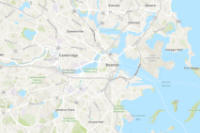

In [12]:
layer = my_gis.content.search("ParcelsValue_CopyFeatures3","Feature Layer")[0]
layer

<Item title:"ParcelsValue_CopyFeatures" type:Feature Layer Collection owner:CLechot_zurich>
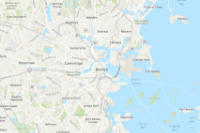

In [15]:
layer_to_update = my_gis.content.search("ParcelsValue_CopyFeatures","Feature Layer")[2]
layer_to_update

In [16]:
data_layer = pd.DataFrame.spatial.from_layer(layer.layers[0])
data_layer.head()

,AV_BLDG,AV_LAND,AV_TOTAL,BATCH,BRA_Name,CM_ID,DupPID,Exclude,Field,GA_int,...,YR_REMOD,Ycoord,YearBuilt,ZIPCODE,wtScoreImp,wtScoreLU,wtScoreRFAR,wtScoreSum,wtScoreVac,wtScoreYear
0,312100,133500,445600,None,None,,None,9,None,5524,...,1990,42.313235,1990,02121,0.25,2.25,0,3,0.25,0.25


In [17]:
fset = layer.layers[0].query()

In [18]:
fset.features[0].geometry

{'rings': [[[769658.44484809, 2939488.01055673],
   [769623.373328045, 2939394.37113264],
   [769592.044432029, 2939405.74610865],
   [769576.995504007, 2939411.24630065],
   [769610.200912043, 2939505.13468474],
   [769658.44484809, 2939488.01055673]]]}

In [19]:
g = Geometry(fset.features[0].geometry)
g.as_arcpy

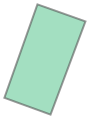

In [20]:
g

In [21]:
h = Geometry(fset.features[0].geometry)

In [22]:
h.area

-5016.96142578125

In [23]:
theArrayFromArcGIS = h.coordinates()
theArrayFromArcGIS

array([[[ 769658.44484809, 2939488.01055673],
        [ 769623.37332805, 2939394.37113264],
        [ 769592.04443203, 2939405.74610865],
        [ 769576.99550401, 2939411.24630065],
        [ 769610.20091204, 2939505.13468474],
        [ 769658.44484809, 2939488.01055673]]])

In [24]:
h.type

'Polygon'

In [25]:
layer.layers[0].properties['hasZ']

True

In [26]:
layer.layers[0].properties['allowGeometryUpdates']

True

In [27]:
layer.layers[0].properties['extent']['spatialReference']

{'wkid': 102686, 'latestWkid': 2249}

### 2. PRT Generation

In [28]:
if(not pyprt.is_prt_initialized()):
    raise Exception("PRT is not initialized")

Test with quad-like initial shape:

In [29]:
initialGeometry = pyprt.CustomGeometry()

v = [0, 0, 0,  0, 0, 2,  1, 0, 1,  1, 0, 0]
vC = 12
ind = [0, 1, 2, 3]
indC = 4
fC = [4]
fCC = 1

initialGeometry.setVertices(v)
initialGeometry.setVertexCount(vC)
initialGeometry.setIndices(ind)
initialGeometry.setIndexCount(indC)
initialGeometry.setFaceCounts(fC)
initialGeometry.setFaceCountsCount(fCC)

mod2 = pyprt.ModelGenerator(initialGeometry, asset_file("simple_rule2019.rpk"), ["ruleFile:string=bin/simple_rule2019.cgb", "startRule:string=Default$Footprint"], ["baseName:string=theModelSuper"])

if(mod2.generate_model()):
    geo2 = mod2.get_model_geometry()
    geo_numpy2 = np.array(geo2)
    print("\nSize of the matrix containing all the model vertices:")
    print(geo_numpy2.shape)
    rep_float2 = mod2.get_model_float_report()
    rep_string2 = mod2.get_model_string_report()
    rep_bool2 = mod2.get_model_bool_report()
    print("\nReport of the generated model:")
    if(len(rep_float2)):
        print(rep_float2)
    if(len(rep_string2)):
        print(rep_string2)
    if(len(rep_bool2)):
        print(rep_bool2)
else:
     print("\nError while instanciating the model generator.")


Size of the matrix containing all the model vertices:
(8, 3)

Report of the generated model:
{'Building Height.0': 11.216289520263672, 'Id': 0.0, 'Max Height.0': 30.0, 'Min Height.0': 10.0, 'Parcel Area.0': 1.5}


In [30]:
theAArray = theArrayFromArcGIS[0]
theAArray

array([[ 769658.44484809, 2939488.01055673],
       [ 769623.37332805, 2939394.37113264],
       [ 769592.04443203, 2939405.74610865],
       [ 769576.99550401, 2939411.24630065],
       [ 769610.20091204, 2939505.13468474],
       [ 769658.44484809, 2939488.01055673]])

 The coordinates are latitude and longitude of the vertices.

The polygon geometry in ArcGIS always contains one vertex more (which is a copy of the first point) that has to be removed. Moreover, as the geometry was in 2D, a third dimension is added and inserted at index 1 column.

In [31]:
a = theAArray[:-1]
c = np.insert(a, 1, 0, axis=1)
d = np.reshape(c,(1,c.shape[0]*c.shape[1]))

In [36]:
d

array([[ 769658.44484809,       0.        , 2939488.01055673,
         769623.37332805,       0.        , 2939394.37113264,
         769592.04443203,       0.        , 2939405.74610865,
         769576.99550401,       0.        , 2939411.24630065,
         769610.20091204,       0.        , 2939505.13468474]])

In [37]:
initialGeometry3 = pyprt.CustomGeometry()

v3 = d.tolist()[0]
vC3 = len(v3)
indC3 = int(vC3/3)
ind3 = np.arange(int(indC3)).tolist()
fC3 = [int(indC3)]
fCC3 = len(fC3)

In [38]:
print(v3)
print(vC3)
print(ind3)
print(indC3)
print(fC3)
print(fCC3)

[769658.44484809, 0.0, 2939488.01055673, 769623.373328045, 0.0, 2939394.37113264, 769592.044432029, 0.0, 2939405.74610865, 769576.995504007, 0.0, 2939411.24630065, 769610.200912043, 0.0, 2939505.13468474]
15
[0, 1, 2, 3, 4]
5
[5]
1


In [39]:
initialGeometry3.setVertices(v3)
initialGeometry3.setVertexCount(vC3)
initialGeometry3.setIndices(ind3)
initialGeometry3.setIndexCount(indC3)
initialGeometry3.setFaceCounts(fC3)
initialGeometry3.setFaceCountsCount(fCC3)

In [40]:
mod3 = pyprt.ModelGenerator(initialGeometry3, asset_file("simple_rule2019.rpk"), ["ruleFile:string=bin/simple_rule2019.cgb", "startRule:string=Default$Footprint"], ["baseName:string=theModelSuper"])

In [41]:
if(mod3.generate_model()):
    geo3 = mod3.get_model_geometry()
    geo_numpy3 = np.array(geo3)
    print("\nSize of the matrix containing all the model vertices:")
    print(geo_numpy3.shape)
    rep_float3 = mod3.get_model_float_report()
    rep_string3 = mod3.get_model_string_report()
    rep_bool3 = mod3.get_model_bool_report()
    print("\nReport of the generated model:")
    if(len(rep_float3)):
        print(rep_float3)
    if(len(rep_string3)):
        print(rep_string3)
    if(len(rep_bool3)):
        print(rep_bool3)
else:
     print("\nError while instanciating the model generator.")


Size of the matrix containing all the model vertices:
(10, 3)

Report of the generated model:
{'Building Height.0': 11.216289520263672, 'Id': 0.0, 'Max Height.0': 30.0, 'Min Height.0': 10.0, 'Parcel Area.0': 5016.9609375}


We can see that the Parcel Area reported is equal to arcgis geometry area (without the negative sign).

In [42]:
print("\nShutdown PRT.")
pyprt.shutdown_prt()


Shutdown PRT.


 ### 3. From Python geometry to ArcGIS (THIS IS NOT WORKNIG...)

In [43]:
geo3

[[769658.4448523282, 0.0, 2939488.0105556627],
 [769623.3733267544, 0.0, 2939394.3711284776],
 [769592.0444350003, 0.0, 2939405.7461055894],
 [769576.9955076932, 0.0, 2939411.2463039537],
 [769610.2009176968, 0.0, 2939505.134682097],
 [769658.4448523282, 11.216289520263672, 2939488.0105556627],
 [769623.3733267544, 11.216289520263672, 2939394.3711284776],
 [769592.0444350003, 11.216289520263672, 2939405.7461055894],
 [769576.9955076932, 11.216289520263672, 2939411.2463039537],
 [769610.2009176968, 11.216289520263672, 2939505.134682097]]

In [44]:
geo_numpy3

array([[7.69658445e+05, 0.00000000e+00, 2.93948801e+06],
       [7.69623373e+05, 0.00000000e+00, 2.93939437e+06],
       [7.69592044e+05, 0.00000000e+00, 2.93940575e+06],
       [7.69576996e+05, 0.00000000e+00, 2.93941125e+06],
       [7.69610201e+05, 0.00000000e+00, 2.93950513e+06],
       [7.69658445e+05, 1.12162895e+01, 2.93948801e+06],
       [7.69623373e+05, 1.12162895e+01, 2.93939437e+06],
       [7.69592044e+05, 1.12162895e+01, 2.93940575e+06],
       [7.69576996e+05, 1.12162895e+01, 2.93941125e+06],
       [7.69610201e+05, 1.12162895e+01, 2.93950513e+06]])

In [45]:
from copy import deepcopy

In [46]:
template_feature = deepcopy(layer_to_update.layers[0].query().features[0])

In [122]:
template_feature.geometry['rings']

[[[769634.322891235, 5.60814476013184],
  [769610.200927734, 11.2162895202637],
  [769623.373321533, 11.2162895202637],
  [769658.444854736, 11.2162895202637],
  [769634.322891235, 5.60814476013184]],
 [[769610.200927734, 0],
  [769634.322891235, 5.60814476013184],
  [769658.444854736, 0],
  [769623.373321533, 0],
  [769610.200927734, 0]]]

In [125]:
for row in geo3:
    row[1], row[2] = row[2], row[1]

In [126]:
geo3

[[769658.4448523282, 2939488.0105556627, 0.0],
 [769623.3733267544, 2939394.3711284776, 0.0],
 [769592.0444350003, 2939405.7461055894, 0.0],
 [769576.9955076932, 2939411.2463039537, 0.0],
 [769610.2009176968, 2939505.134682097, 0.0],
 [769658.4448523282, 2939488.0105556627, 11.216289520263672],
 [769623.3733267544, 2939394.3711284776, 11.216289520263672],
 [769592.0444350003, 2939405.7461055894, 11.216289520263672],
 [769576.9955076932, 2939411.2463039537, 11.216289520263672],
 [769610.2009176968, 2939505.134682097, 11.216289520263672],
 [769658.4448523282, 2939488.0105556627, 0.0]]

In [127]:
geo3.append(geo3[0])
geo3

[[769658.4448523282, 2939488.0105556627, 0.0],
 [769623.3733267544, 2939394.3711284776, 0.0],
 [769592.0444350003, 2939405.7461055894, 0.0],
 [769576.9955076932, 2939411.2463039537, 0.0],
 [769610.2009176968, 2939505.134682097, 0.0],
 [769658.4448523282, 2939488.0105556627, 11.216289520263672],
 [769623.3733267544, 2939394.3711284776, 11.216289520263672],
 [769592.0444350003, 2939405.7461055894, 11.216289520263672],
 [769576.9955076932, 2939411.2463039537, 11.216289520263672],
 [769610.2009176968, 2939505.134682097, 11.216289520263672],
 [769658.4448523282, 2939488.0105556627, 0.0],
 [769658.4448523282, 2939488.0105556627, 0.0]]

In [128]:
template_feature.geometry['rings'] = [geo3]

In [129]:
template_feature.geometry['rings']

[[[769658.4448523282, 2939488.0105556627, 0.0],
  [769623.3733267544, 2939394.3711284776, 0.0],
  [769592.0444350003, 2939405.7461055894, 0.0],
  [769576.9955076932, 2939411.2463039537, 0.0],
  [769610.2009176968, 2939505.134682097, 0.0],
  [769658.4448523282, 2939488.0105556627, 11.216289520263672],
  [769623.3733267544, 2939394.3711284776, 11.216289520263672],
  [769592.0444350003, 2939405.7461055894, 11.216289520263672],
  [769576.9955076932, 2939411.2463039537, 11.216289520263672],
  [769610.2009176968, 2939505.134682097, 11.216289520263672],
  [769658.4448523282, 2939488.0105556627, 0.0],
  [769658.4448523282, 2939488.0105556627, 0.0]]]

In [130]:
updated_feature = layer_to_update.layers[0].edit_features(updates = [template_feature])

In [131]:
updated_feature

{'addResults': [],
 'updateResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': None,
   'success': False,
   'error': {'code': 1000,
    'description': 'Data is Null. This method or property cannot be called on Null values.'}}],
 'deleteResults': []}

In [132]:
template_feature

{"geometry": {"rings": [[[769658.4448523282, 2939488.0105556627, 0.0], [769623.3733267544, 2939394.3711284776, 0.0], [769592.0444350003, 2939405.7461055894, 0.0], [769576.9955076932, 2939411.2463039537, 0.0], [769610.2009176968, 2939505.134682097, 0.0], [769658.4448523282, 2939488.0105556627, 11.216289520263672], [769623.3733267544, 2939394.3711284776, 11.216289520263672], [769592.0444350003, 2939405.7461055894, 11.216289520263672], [769576.9955076932, 2939411.2463039537, 11.216289520263672], [769610.2009176968, 2939505.134682097, 11.216289520263672], [769658.4448523282, 2939488.0105556627, 0.0], [769658.4448523282, 2939488.0105556627, 0.0]]]}, "attributes": {"OBJECTID": 1, "Join_Count": 1, "TARGET_FID": 1, "WARD": 12, "PARCEL": "2742", "PID_LONG": "1202742000", "WPD": "12-06-005", "BATCH": null, "PID": "1202742000", "CM_ID": "", "GIS_ID": "1202742000", "ST_NUM": "35  ", "ST_NAME": "GASTON", "ST_NAME_SUF": "ST", "UNIT_NUM": "", "ZIPCODE": "02121", "PTYPE": "105", "LU": "R3", "OWN_OCC":

In [133]:
layer_to_update

<Item title:"ParcelsValue_CopyFeatures" type:Feature Layer Collection owner:CLechot_zurich>

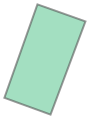

In [95]:
ggg = Geometry(layer.layers[0].query().features[0].geometry)
ggg

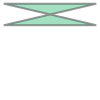

In [96]:
gggg = Geometry(layer_to_update.layers[0].query().features[0].geometry)
gggg

In [97]:
layer.layers[0].query().features[0].geometry

{'rings': [[[769658.44484809, 2939488.01055673],
   [769623.373328045, 2939394.37113264],
   [769592.044432029, 2939405.74610865],
   [769576.995504007, 2939411.24630065],
   [769610.200912043, 2939505.13468474],
   [769658.44484809, 2939488.01055673]]]}

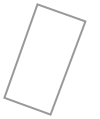

In [98]:
gg = Geometry(template_feature.geometry)
gg

In [109]:
gg.area

-10033.923828125

TO DO: update the shape_area and shape_length field before updating the feature layer?

In [99]:
template_feature.geometry

{'rings': [[[769658.4448523282, 2939488.0105556627, 0.0],
   [769623.3733267544, 2939394.3711284776, 0.0],
   [769592.0444350003, 2939405.7461055894, 0.0],
   [769576.9955076932, 2939411.2463039537, 0.0],
   [769610.2009176968, 2939505.134682097, 0.0],
   [769658.4448523282, 2939488.0105556627, 11.216289520263672],
   [769623.3733267544, 2939394.3711284776, 11.216289520263672],
   [769592.0444350003, 2939405.7461055894, 11.216289520263672],
   [769576.9955076932, 2939411.2463039537, 11.216289520263672],
   [769610.2009176968, 2939505.134682097, 11.216289520263672],
   [769658.4448523282, 2939488.0105556627, 0.0]]]}

In [101]:
gg.area

-10033.923828125

In [106]:
[template_feature]

[{"geometry": {"rings": [[[769658.4448523282, 2939488.0105556627, 0.0], [769623.3733267544, 2939394.3711284776, 0.0], [769592.0444350003, 2939405.7461055894, 0.0], [769576.9955076932, 2939411.2463039537, 0.0], [769610.2009176968, 2939505.134682097, 0.0], [769658.4448523282, 2939488.0105556627, 11.216289520263672], [769623.3733267544, 2939394.3711284776, 11.216289520263672], [769592.0444350003, 2939405.7461055894, 11.216289520263672], [769576.9955076932, 2939411.2463039537, 11.216289520263672], [769610.2009176968, 2939505.134682097, 11.216289520263672], [769658.4448523282, 2939488.0105556627, 0.0]]]}, "attributes": {"OBJECTID": 1, "Join_Count": 1, "TARGET_FID": 1, "WARD": 12, "PARCEL": "2742", "PID_LONG": "1202742000", "WPD": "12-06-005", "BATCH": null, "PID": "1202742000", "CM_ID": "", "GIS_ID": "1202742000", "ST_NUM": "35  ", "ST_NAME": "GASTON", "ST_NAME_SUF": "ST", "UNIT_NUM": "", "ZIPCODE": "02121", "PTYPE": "105", "LU": "R3", "OWN_OCC": "Y", "OWNER": "SALDARRIAGA HECTOR", "MAIL_AD

In [105]:
layer.layers[0].query().features

[{"geometry": {"rings": [[[769658.44484809, 2939488.01055673], [769623.373328045, 2939394.37113264], [769592.044432029, 2939405.74610865], [769576.995504007, 2939411.24630065], [769610.200912043, 2939505.13468474], [769658.44484809, 2939488.01055673]]]}, "attributes": {"OBJECTID": 1, "Join_Count": 1, "TARGET_FID": 1, "WARD": 12, "PARCEL": "2742", "PID_LONG": "1202742000", "WPD": "12-06-005", "BATCH": null, "PID": "1202742000", "CM_ID": "", "GIS_ID": "1202742000", "ST_NUM": "35  ", "ST_NAME": "GASTON", "ST_NAME_SUF": "ST", "UNIT_NUM": "", "ZIPCODE": "02121", "PTYPE": "105", "LU": "R3", "OWN_OCC": "Y", "OWNER": "SALDARRIAGA HECTOR", "MAIL_ADDRESSEE": "C/O HECTOR SALDARRIAGA", "MAIL_ADDRESS": "35 GASTON ST", "MAIL_CS": "DORCHESTER MA", "MAIL_ZIPCODE": "02121", "AV_LAND": "133500", "AV_BLDG": "312100", "AV_TOTAL": "445600", "GROSS_TAX": "000000466989", "LAND_SF": "5000", "YR_BUILT": "1905", "YR_REMOD": "1990", "GROSS_AREA": "5524", "LIVING_AREA": "3567", "NUM_FLOORS": "2.5", "Xcoord": -71.

In [119]:
layer.layers[0].query().spatial_reference

{'wkid': 102686, 'latestWkid': 2249}

In [120]:
layer_to_update.layers[0].edit_features(updates = [template_feature])

{'addResults': [],
 'updateResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': None,
   'success': False,
   'error': {'code': 1000,
    'description': 'Data is Null. This method or property cannot be called on Null values.'}}],
 'deleteResults': []}

In [135]:
map2 = my_gis.map()
map2

MapView(layout=Layout(height='400px', width='100%'))

In [136]:
map2.add_layer(layer_to_update)

In [137]:
map2.add_layer(layer)

The following scene layer was generated using arcpy FeaturesFromCityEngineRules_3d function. It was used to see in which format ArcGIS Pro would use for this type of 3D shape.

<Item title:"ParcelsValue_CopyFeatures_FF" type:Scene Layer owner:CLechot_zurich>
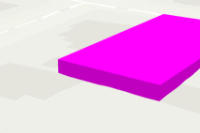

In [141]:
hello = my_gis.content.search("ParcelsValue_CopyFeatures","Scene Layer")[0]
hello

In [143]:
hello.layers[0].query()

AttributeError: 'Layer' object has no attribute 'query'